### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os

In [2]:
# Used from PV
df = pd.read_csv('../cplex_pyomo_ed/genActPower.csv', sep=',')
epv = df.mean(axis = 1).sum()*24
print(epv)

50.83098816947003


In [3]:
# Used from grid (imported)
df = pd.read_csv('../cplex_pyomo_ed/pimp.csv', sep=',')
eg = df.mean(axis = 0).sum()*24
print(eg)

12.510635826630388


In [4]:
# Not used from PV (exported)
df = pd.read_csv('../cplex_pyomo_ed/pexp.csv', sep=',')
ewpv = df.mean(axis = 0).sum()*24
print(ewpv)

2.6173919167651523


### Create Area Chart graphs

#### Production (1 week)

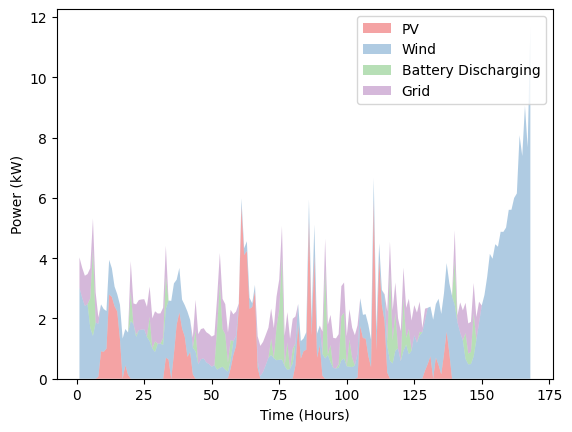

In [5]:
import seaborn as sns

act_power = pd.read_csv('../cplex_pyomo_ed/genActPower.csv', sep=',')
stor_dch_power = pd.read_csv('../cplex_pyomo_ed/storDchActPower.csv', sep=',')
pimp = pd.read_csv('../cplex_pyomo_ed/pimp.csv', sep=',')

# Your x and y axis
x = range(1,24*7+1)
y = [ act_power.loc[0], act_power.loc[1], stor_dch_power.iloc[0], pimp["0"] ]
 
# use a known color palette
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=['PV','Wind','Battery Discharging', 'Grid'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()
 

#### Production (1 day)

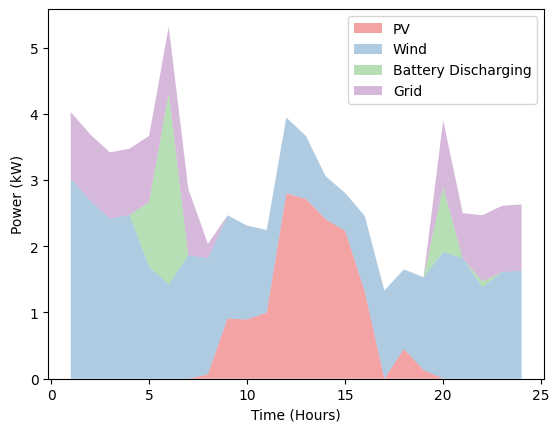

In [8]:
x = range(1,24+1)
y = [ act_power.loc[0][:24], act_power.loc[1][:24], stor_dch_power.iloc[0][:24], pimp["0"][:24] ]
 
pal = sns.color_palette("Set1")
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['PV','Wind','Battery Discharging', 'Grid'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Battery events and state (1 week)

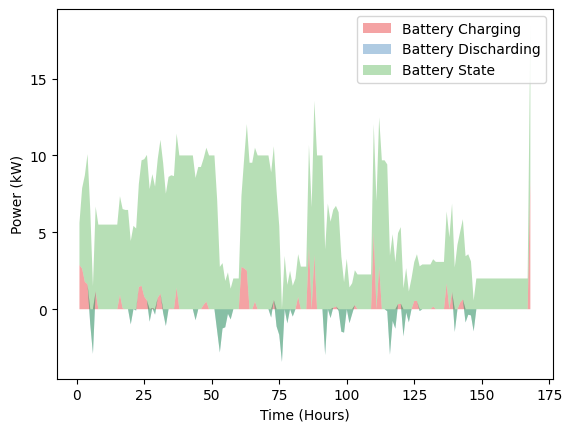

In [9]:
stor_ener_state = pd.read_csv('../cplex_pyomo_ed/storEnerState.csv', sep=',')

stor_dch_power[:] = stor_dch_power[:]*(-1)

x = range(1,24*7+1)
y = [stor_ch_power.iloc[0], stor_dch_power.iloc[0], stor_ener_state.iloc[0]]
 
pal = sns.color_palette("Set1")
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['Battery Charging', 'Battery Discharding', 'Battery State'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Battery events and state (1 week) - Normal plot

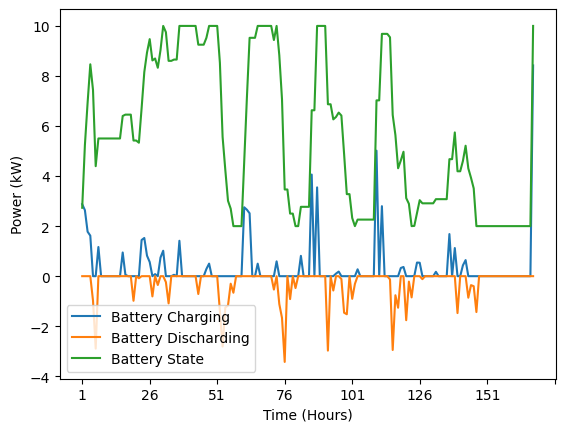

In [10]:
stor_ch_power.iloc[0].plot(legend=True, label='Battery Charging')
stor_dch_power.iloc[0].plot(legend=True, label='Battery Discharding')
stor_ener_state.iloc[0].plot(legend=True, label='Battery State')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

##### Battery events and state (1 day) - Normal plot

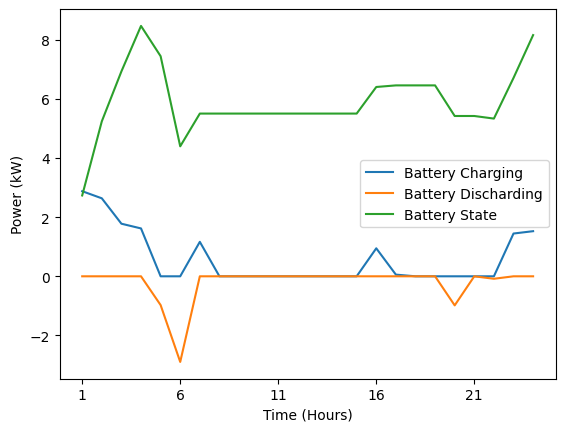

In [11]:
stor_ch_power.iloc[0][:24].plot(legend=True, label='Battery Charging')
stor_dch_power.iloc[0][:24].plot(legend=True, label='Battery Discharding')
stor_ener_state.iloc[0][:24].plot(legend=True, label='Battery State')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Battery events and state (1/2 day) - Normal plot

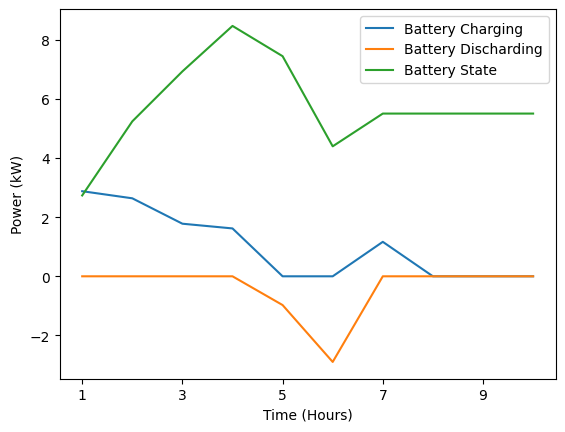

In [12]:
stor_ch_power.iloc[0][:24]

stor_ch_power.iloc[0][:10].plot(legend=True, label='Battery Charging')
stor_dch_power.iloc[0][:10].plot(legend=True, label='Battery Discharding')
stor_ener_state.iloc[0][:10].plot(legend=True, label='Battery State')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

##### Battery events and state (2 days) - Normal plot

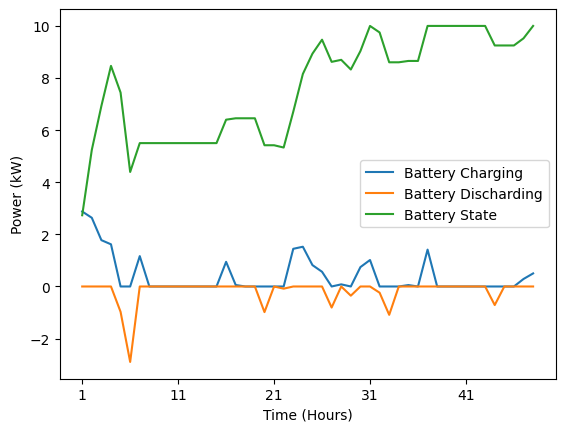

In [13]:
stor_ch_power.iloc[0][0:48].plot(legend=True, label='Battery Charging')
stor_dch_power.iloc[0][0:48].plot(legend=True, label='Battery Discharding')
stor_ener_state.iloc[0][0:48].plot(legend=True, label='Battery State')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (kW)")
plt.show()

#### Battery events and state (1/2 day) with SOC in kWh

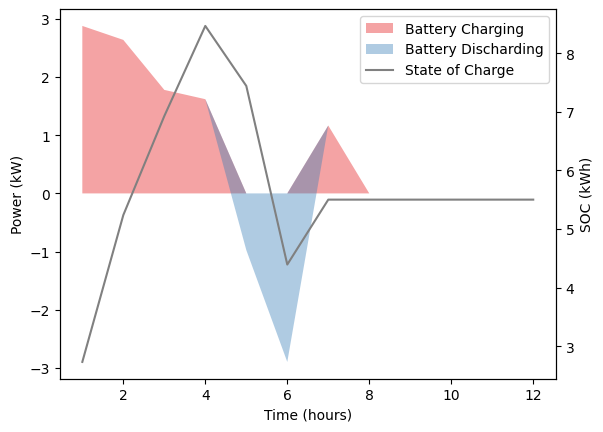

In [14]:
x = range(1,12+1)
y = [stor_ch_power.iloc[0][:12], stor_dch_power.iloc[0][:12]]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1 = ax1.stackplot(x,y, labels=['Battery Charging', 'Battery Discharding'], colors=pal, alpha=0.4 )
lns2 = ax2.plot(x, stor_ener_state.iloc[0][:12], 'gray', label='State of Charge')

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Power (kW)', color='black')
ax2.set_ylabel('SOC (kWh)', color='black')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.show()

#### Battery events and state (1/2 day) with SOC in % (using stacked area chart)

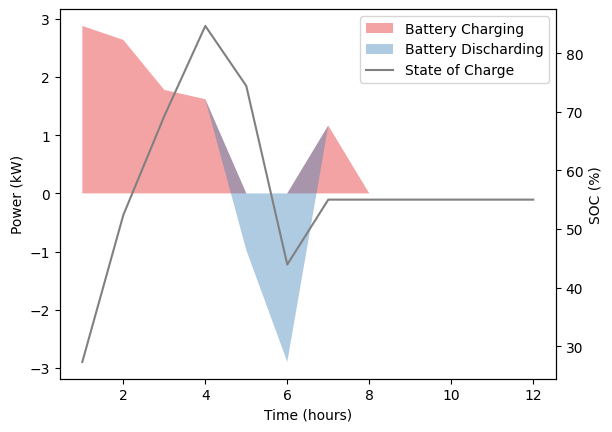

In [15]:
x = range(1,12+1)
y = [stor_ch_power.iloc[0][:12], stor_dch_power.iloc[0][:12]]
bat_capacity = 10

fig, ax1 = plt.subplots()

# Convert state of charge (SOC) from kWh to %
stor_ener_state.iloc[0][:] = stor_ener_state.iloc[0][:]/bat_capacity*100

ax2 = ax1.twinx()
lns1 = ax1.stackplot(x,y, labels=['Battery Charging', 'Battery Discharding'], colors=pal, alpha=0.4 )
lns2 = ax2.plot(x, stor_ener_state.iloc[0][:12], 'gray', label='State of Charge')

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Power (kW)', color='black')
ax2.set_ylabel('SOC (%)', color='black')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.show()

#### Battery events and state (1/2 day) with SOC in % (without using stacked area chart)

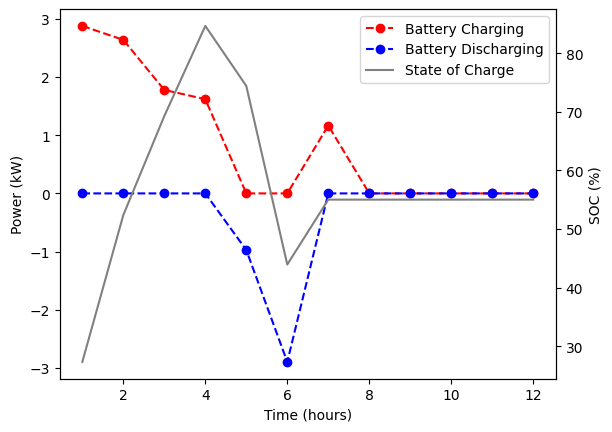

In [16]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1 = ax1.plot(x, stor_ch_power.iloc[0][:12], color='red', label='Battery Charging', marker='o', linestyle='dashed')
lns2 = ax1.plot(x, stor_dch_power.iloc[0][:12], color='blue', label='Battery Discharging', marker='o', linestyle='dashed')
lns3 = ax2.plot(x, stor_ener_state.iloc[0][:12], 'gray', label='State of Charge')

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Power (kW)', color='black')
ax2.set_ylabel('SOC (%)', color='black')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.show()

#### Battery events and state (1 day) with SOC in %

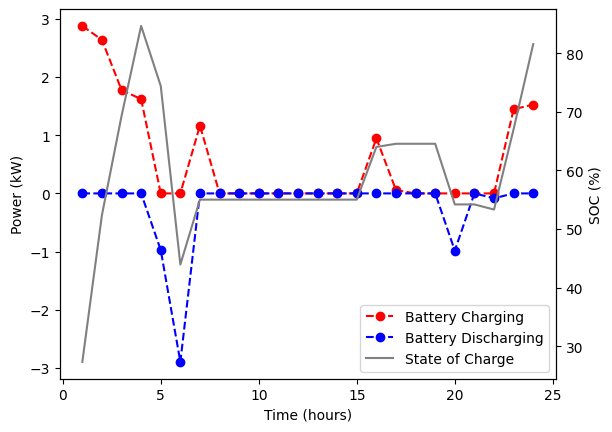

In [17]:
fig, ax1 = plt.subplots()

x = range(1,24+1)
ax2 = ax1.twinx()
lns1 = ax1.plot(x, stor_ch_power.iloc[0][:24], color='red', label='Battery Charging', marker='o', linestyle='dashed')
lns2 = ax1.plot(x, stor_dch_power.iloc[0][:24], color='blue', label='Battery Discharging', marker='o', linestyle='dashed')
lns3 = ax2.plot(x, stor_ener_state.iloc[0][:24], 'gray', label='State of Charge')

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Power (kW)', color='black')
ax2.set_ylabel('SOC (%)', color='black')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.show()

### Calculations for whole week

#### Battery

In [ ]:
#for i in range(7):
    #print(str(24*i)+":"+str(24*(i+1)))
    #print(stor_ch_power.iloc[0][24*i:24*(i+1)].sum())

#Storage Charge
print("Storage Charge")
print([stor_ch_power.iloc[0][24*i:24*(i+1)].sum() for i in range(7)])

#Storage Discharge
print("Storage Discharge")
print([stor_dch_power.iloc[0][24*i:24*(i+1)].sum() for i in range(7)])

#State of Charge
print("State of Charge")
print([stor_ener_state.iloc[0][24*i:24*(i+1)].mean() for i in range(7)])

#### Consumption

In [ ]:
#Houses
for j in range(5):
    print("House #" + str(j+1))
    print([loadLimit[:, :, 0][j, 24*i:24*(i+1)].sum() for i in range(7)])

#Battery Charging
print("Battery Charging")
print([stor_ch_power.iloc[0][24*i:24*(i+1)].sum() for i in range(7)])

#### Production

In [ ]:
#PV Production
print("PV Production")
print([act_power.loc[0][24*i:24*(i+1)].sum() for i in range(7)])

#Wind Production
print("Wind Production")
print([act_power.loc[1][24*i:24*(i+1)].sum() for i in range(7)])

#Battery Discharging
print("Battery Discharging")
print([stor_dch_power.iloc[0][24*i:24*(i+1)].sum() for i in range(7)])

#Grid
print("Grid")
print([pimp["0"][24*i:24*(i+1)].sum() for i in range(7)])